In [19]:
## IMPORT RELEVANT LIBRARIES

# IMPORT DATA WRANGLING LIB
import pandas as pd
import numpy as np
from   skimpy import skim
import missingno

# IMPORT DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING AND CLEANING DEMOGRAPIC DATA

In [20]:
# Import Customer Demographic 

demo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 3 , header = 1)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

C:\Users\Owner\AppData\Local\Temp/ipykernel_16864/4099799583.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  demo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 3 , header = 1)


In [21]:
skim(demo)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 4000   │ │ object      │ 9     │                                    │
│ │ Number of columns │ 13     │ │ int64       │ 2     │                                    │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                    │
│                                │ float64     │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃             ┃ missing ┃ complete    ┃ mean ┃ sd   ┃ p0 ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃             ┃         ┃ rate        ┃      ┃      ┃    ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ customer_id │       0 │           1 │ 2000 │ 1200 │  1 │ 1000 │ 3000 │ 4000 │ ██████ │  │
│ │ past_3_year │       0 │           1 │   49 │   29 │  0 │   24 │   73 │   99 │ █▇█▇█▇ │  │
│ │ s_bike_re   │         │             │      │      │    │      │      │      │        │  │
│ │ tenure      │      87 │        0.98 │   11 │  5.7 │  1 │    6 │   15 │   22 │ ▆▆█▆▇▃ │  │
│ └─────────────┴─────────┴─────────────┴──────┴──────┴────┴──────┴──────┴──────┴────────┘  │
│                                         datetime                                          │
│ ┏━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃       ┃ missing    ┃ complete rate     ┃ first         ┃ last          ┃ frequency   ┃  │
│ ┡━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ DOB   │         87 │              0.98 │  1843-12-21   │  2002-03-11   │ None        │  │
│ └───────┴────────────┴───────────────────┴───────────────┴───────────────┴─────────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

<AxesSubplot:>

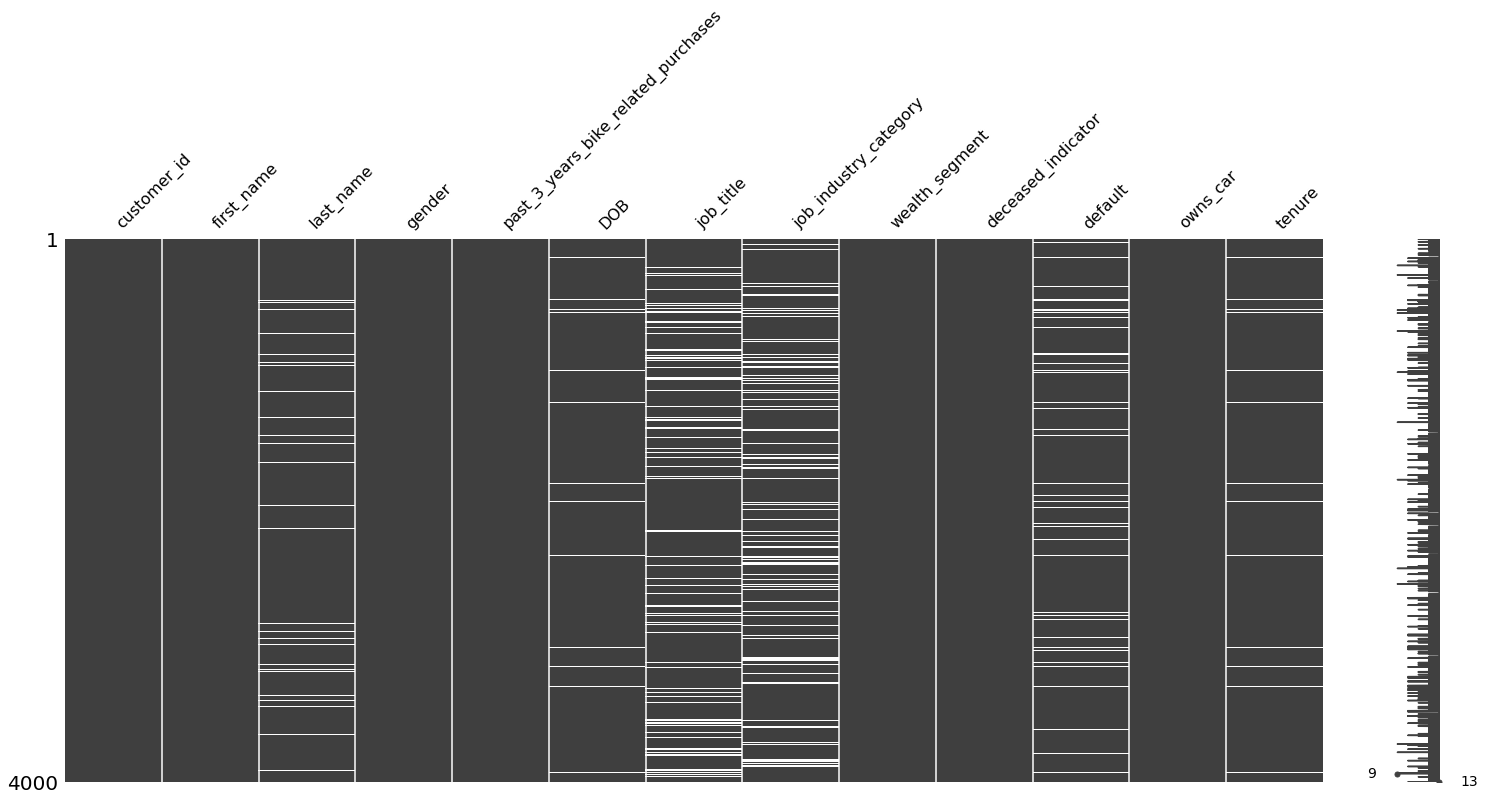

In [22]:
missingno.matrix(demo)

In [23]:
full_range = np.arange(demo.customer_id.min(), demo.customer_id.max()+1, 1)

customers  = demo.customer_id.values

mask = [i not in customers for i in full_range ]
full_range[mask]

array([], dtype=int32)

COLUMNS WITH MISSING VALUES 
- last_name
- DOB
- job_title
- job_industry_category
- default
- tenure

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

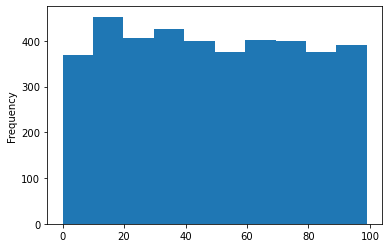

In [24]:
# First find if there are customer_id for dublicates - good , no dublicates 
demo['customer_id'].duplicated().value_counts()

#Visalizing last three years - Good distribution
demo.past_3_years_bike_related_purchases.plot(kind = 'hist')
related_pur = demo.past_3_years_bike_related_purchases

# customer Segments - Good 
demo.wealth_segment.unique()

# Evaluate if customer is alive or dead - Not to use only customers tata are not deceasd 
demo.deceased_indicator.value_counts()


## FAULTY 
# An DOB that seems like an outlier $demo.DOB.min()$.
demo[demo.DOB <= '1930-12-21']

# Ensuring consitency in gender - INconsitencyy with the unique vbalues especially 'U'
demo.gender.value_counts()


### IMPORTING AND CLEANING CUSTOMER ADDRESS1 DATA

In [25]:
# Import CUSTOMER daTA 

address_data = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 4 , header = 1)
address_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


<AxesSubplot:>

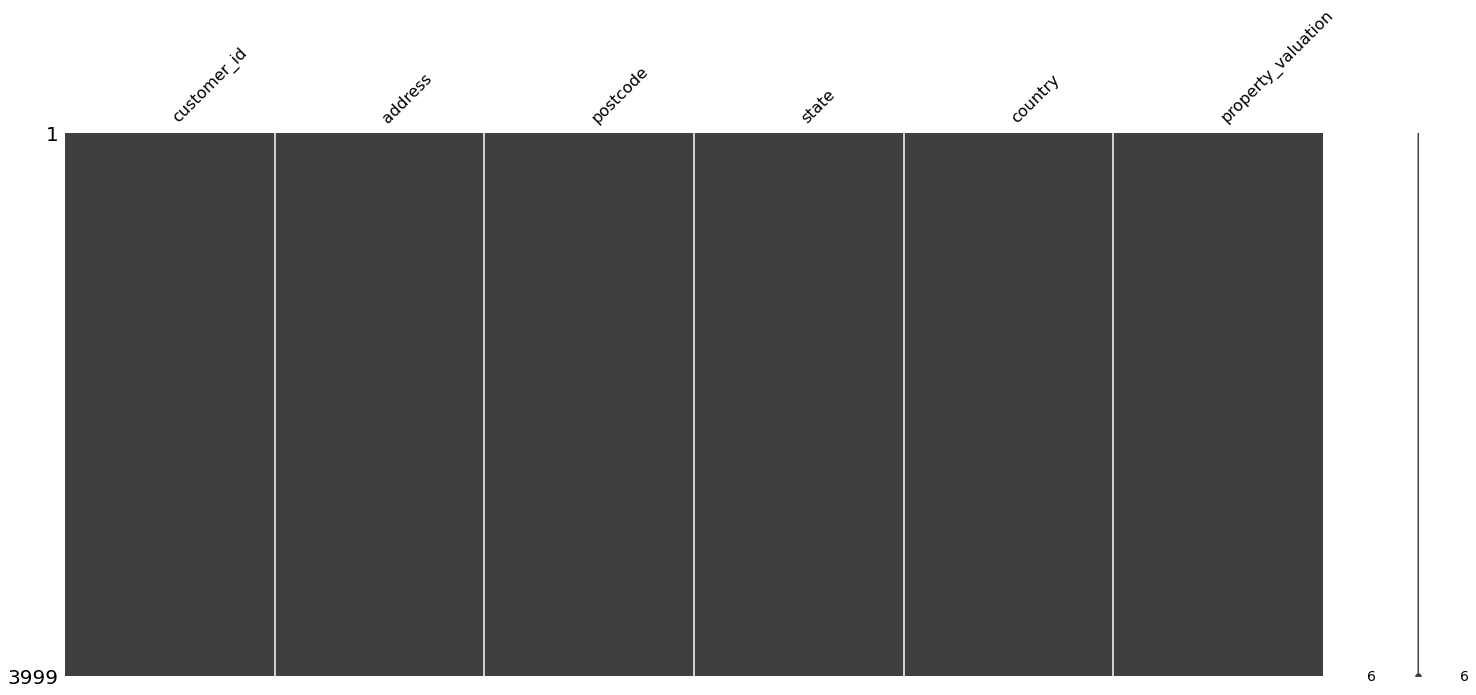

In [26]:
missingno.matrix(address_data)

In [27]:
# The number of customers is one lesss than, so lets find if thers a missin customer_id

full_range = np.arange(address_data.customer_id.min(), address_data.customer_id.max()+1, 1)

customers  = address_data.customer_id.values

mask = [i not in customers for i in full_range ]
full_range[mask]

array([ 3, 10, 22, 23])

In [28]:
# Check customers with similar address
'''Having the same address in different regions , we have to investigate the address to fnd out the most appropriate'''
address_data[address_data.address.duplicated(keep=False)]



,customer_id,address,postcode,state,country,property_valuation
732,737,3 Talisman Place,4811,QLD,Australia,2
2315,2320,64 Macpherson Junction,2208,NSW,Australia,11
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


In [29]:
address_data.state.unique()
#There are some repatig variables  NSW is the same as 'New South Wales'
#VIC similar to 'Victoria'

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

### IMPORTING AND CLEANING Transaction data in the past three months

In [30]:
# Import CUSTOMER daTA 

transaction_data = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 1 , header = 1)
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [35]:
# We need data for the last three months, ,so i will find the last date and 3 months before that
transaction_data.transaction_date.max() 
'The maximum date is 30th december 2017, so we want to find all transaction data for wich will begin fom 2017-10-01'

Timestamp('2017-12-30 00:00:00')

In [38]:
transc_selected = transaction_data[transaction_data.transaction_date > '2017-09-30'].sort_values('transaction_date')
transc_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 238 to 13574
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           5080 non-null   int64         
 1   product_id               5080 non-null   int64         
 2   customer_id              5080 non-null   int64         
 3   transaction_date         5080 non-null   datetime64[ns]
 4   online_order             4986 non-null   float64       
 5   order_status             5080 non-null   object        
 6   brand                    5032 non-null   object        
 7   product_line             5032 non-null   object        
 8   product_class            5032 non-null   object        
 9   product_size             5032 non-null   object        
 10  list_price               5080 non-null   float64       
 11  standard_cost            5032 non-null   float64       
 12  product_first_sold_date  5032 n

<AxesSubplot:>

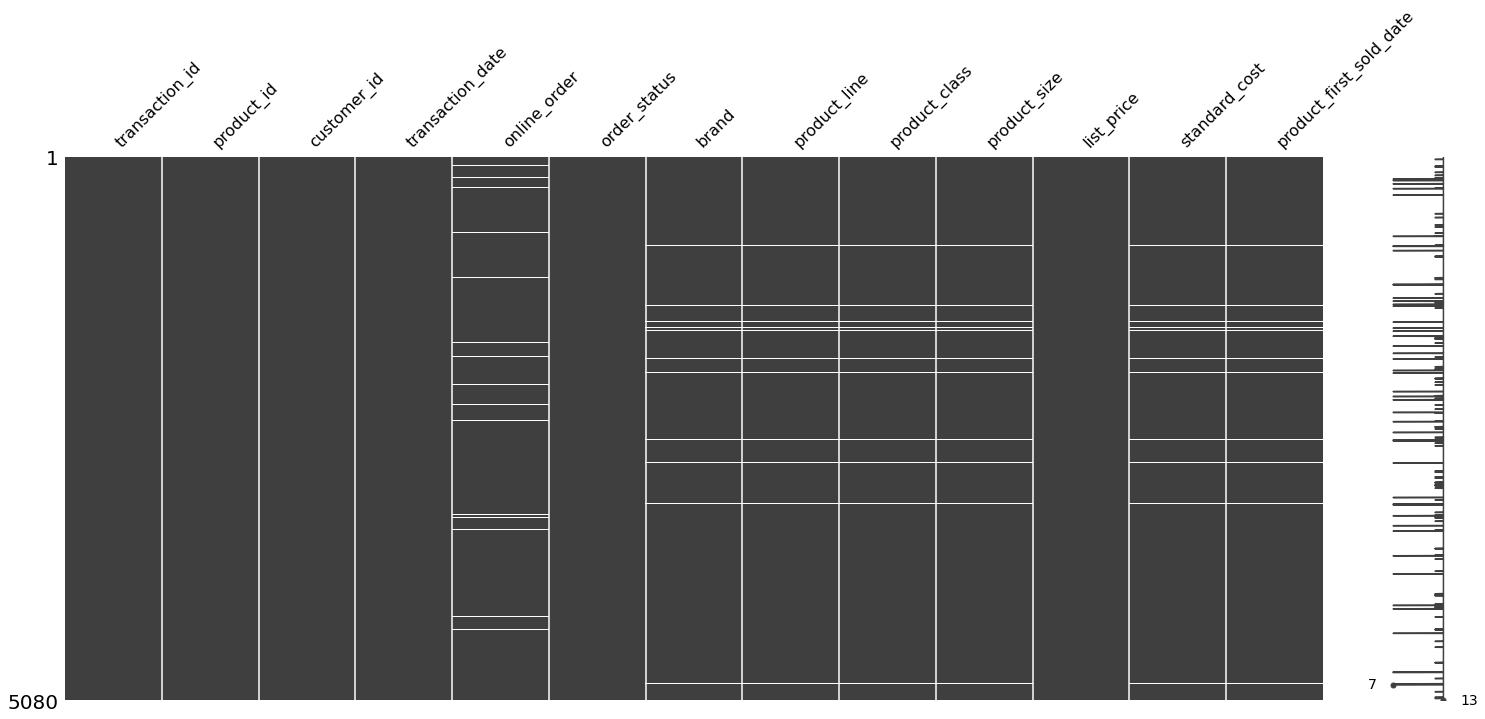

In [49]:
## Find Columns with missing values
missingno.matrix(transc_selected)

'There are certain , rows with up to seven misssing vbaluess. Lets dive and ind out this rows '

In [54]:
missing_var = transc_selected.isna().any(axis = 1).sum()
f'There are {missing_var} with missing values'

'There are 142 with missing values'

In [56]:
transc_selected[transc_selected.isna().any(axis = 1)]


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
16346,16347,69,1507,2017-10-01,NaN,Approved,Norco Bicycles,Road,medium,large,1240.31,795.10,37873.0
3453,3454,34,395,2017-10-02,NaN,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,37838.0
7256,7257,90,1409,2017-10-02,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
16020,16021,78,1438,2017-10-03,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,41533.0
14798,14799,90,3114,2017-10-04,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,36367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,5261,0,3322,2017-12-28,0.0,Approved,NaN,NaN,NaN,NaN,1563.94,NaN,NaN
5861,5862,0,2404,2017-12-28,0.0,Approved,NaN,NaN,NaN,NaN,1672.07,NaN,NaN
1381,1382,96,1393,2017-12-29,NaN,Approved,WeareA2B,Road,low,small,1172.78,1043.77,37539.0
15189,15190,1,362,2017-12-30,NaN,Approved,Giant Bicycles,Touring,medium,large,1873.97,863.95,37873.0


### CHECK RELEVANT ROLES FOR DUPLICATES 

In [64]:
#  Check for dublicate transaction IDs
ct = transc_selected.transaction_id.duplicated(keep = False).any().sum()

f'there are {ct} duplicated transaction IDs'

'there are 0 duplicated transaction IDs'

In [66]:
## Data validations
# Find The number of unique vales in role

for col in transc_selected.columns:
    print(f' {transc_selected[col].nunique()} unique values in {col}')



 5080 unique values in transaction_id
 101 unique values in product_id
 2696 unique values in customer_id
 91 unique values in transaction_date
 2 unique values in online_order
 2 unique values in order_status
 6 unique values in brand
 4 unique values in product_line
 3 unique values in product_class
 3 unique values in product_size
 148 unique values in list_price
 101 unique values in standard_cost
 100 unique values in product_first_sold_date


In [67]:
# COnvert to the right ytype
transc_selected.product_first_sold_date.dtype

'Ought to be in datetimes format'

dtype('float64')

In [1]:
# fibonacci number

fibs  = [1,1]

for i in range(5):
    fibs.append(fibs[-1]+fibs[-2])

fibs

[1, 1, 2, 3, 5, 8, 13]